In [338]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# 1. DATA PREPARATION
## Reading the Data
## Unifying the Data

* Check whether the values in the columns are correctly input.


In [339]:
%time

df=pd.read_csv("/home/leviscoffie/MLzoomcamp/Telco-Churn-Prediction-MLzoomcamp-/WA_Fn-UseC_-Telco-Customer-Churn.csv")



CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 13.1 µs


In [340]:
df.columns.str.replace(' ','_').str.lower()

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [341]:
df.head().T

0             1               2  \
customerID              7590-VHVEG    5575-GNVDE      3668-QPYBK   
gender                      Female          Male            Male   
SeniorCitizen                    0             0               0   
Partner                        Yes            No              No   
Dependents                      No            No              No   
tenure                           1            34               2   
PhoneService                    No           Yes             Yes   
MultipleLines     No phone service            No              No   
InternetService                DSL           DSL             DSL   
OnlineSecurity                  No           Yes             Yes   
OnlineBackup                   Yes            No             Yes   
DeviceProtection                No           Yes              No   
TechSupport                     No            No              No   
StreamingTV                     No            No              No   
StreamingMovies                 No            No              No   
Contract            Month-to-month      One year  Month-to-month   
PaperlessBilling               Yes            No             Yes   
PaymentMethod     Electronic check  Mailed check    Mailed check   
MonthlyCharges               29.85         56.95           53.85   
TotalCharges                 29.85        1889.5          108.15   
Churn                           No            No             Yes   

                                          3                 4  
customerID                       7795-CFOCW        9237-HQITU  
gender                                 Male            Female  
SeniorCitizen                             0                 0  
Partner                                  No                No  
Dependents                               No                No  
tenure                                   45                 2  
PhoneService                             No               Yes  
MultipleLines              No phone service                No  
InternetService                         DSL       Fiber optic  
OnlineSecurity                          Yes                No  
OnlineBackup                             No                No  
DeviceProtection                        Yes                No  
TechSupport                             Yes                No  
StreamingTV                              No                No  
StreamingMovies                          No                No  
Contract                           One year    Month-to-month  
PaperlessBilling                         No               Yes  
PaymentMethod     Bank transfer (automatic)  Electronic check  
MonthlyCharges                         42.3              70.7  
TotalCharges                        1840.75            151.65  
Churn                                    No               Yes

In [342]:
df.columns=df.columns.str.replace(' ','_').str.lower()

categorical_columns=list(df.dtypes[df.dtypes=='object'].index)

categorical_columns

for c in categorical_columns:
    df[c]= df[c].str.lower().str.replace(' ','_')

In [343]:
df.head()

customerid  gender  seniorcitizen partner dependents  tenure phoneservice  \
0  7590-vhveg  female              0     yes         no       1           no   
1  5575-gnvde    male              0      no         no      34          yes   
2  3668-qpybk    male              0      no         no       2          yes   
3  7795-cfocw    male              0      no         no      45           no   
4  9237-hqitu  female              0      no         no       2          yes   

      multiplelines internetservice onlinesecurity  ... deviceprotection  \
0  no_phone_service             dsl             no  ...               no   
1                no             dsl            yes  ...              yes   
2                no             dsl            yes  ...               no   
3  no_phone_service             dsl            yes  ...              yes   
4                no     fiber_optic             no  ...               no   

  techsupport streamingtv streamingmovies        contract paperlessbilling  \
0          no          no              no  month-to-month              yes   
1          no          no              no        one_year               no   
2          no          no              no  month-to-month              yes   
3         yes          no              no        one_year               no   
4          no          no              no  month-to-month              yes   

               paymentmethod monthlycharges  totalcharges churn  
0           electronic_check          29.85         29.85    no  
1               mailed_check          56.95        1889.5    no  
2               mailed_check          53.85        108.15   yes  
3  bank_transfer_(automatic)          42.30       1840.75    no  
4           electronic_check          70.70        151.65   yes  

[5 rows x 21 columns]

In [344]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [345]:
#Convert object to int/float and viceversa to the data that is incongruent


df.totalcharges=pd.to_numeric(df.totalcharges, errors="coerce")
df.totalcharges=df.totalcharges.fillna(0)

In [346]:
df.churn=(df.churn=='yes').astype(int)

df.churn.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

# 3.3 Setting Up the Validation Framework

* Perform the train/validation/test split with Scikit-Learn

In [347]:
from sklearn.model_selection import train_test_split

df_full_train, df_test= train_test_split(df, test_size=0.2, random_state=1)

In [348]:
df_train, df_val= train_test_split(df_full_train, test_size=0.25, random_state=1)

In [349]:
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)


In [350]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [351]:
y_train=df_train.churn.values
y_val=df_val.churn.values
y_test=df_test.churn.values

y_full_train= df_full_train.churn.values

In [352]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

# 3.4 EDA
* Check missng values
* Look at the target variable(churn)
* Look at numerical and categorical variables

In [353]:
# we use the full train dataset for EDA
df_full_train=df_full_train.reset_index(drop=True)

In [354]:
df_full_train.isnull().sum()# there are no missing values. One less thing to worry about

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [355]:
# looking at the target variable

df_full_train.churn.value_counts(normalize=True)

# we see that app 26% of users are churning users. That is what is called the churn rate(global)

0    0.730032
1    0.269968
Name: churn, dtype: float64

In [356]:
global_churn_rate=df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

In [357]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [358]:
df_full_train.dtypes

numerical=['tenure','monthlycharges','totalcharges']

categorical= ['gender', 'seniorcitizen', 'partner', 'dependents','phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [359]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# 3.5 Feature Importance : Churn Rate and Risk Ratio
Feature Importnace analysis is part of EDA- it involves determining which features affect the target variable more.

* Churn Rate
* Risk Ratio
* Mutual Information- later



### Churn Rate

In [360]:
df_full_train.head()

customerid  gender  seniorcitizen partner dependents  tenure phoneservice  \
0  5442-pptjy    male              0     yes        yes      12          yes   
1  6261-rcvns  female              0      no         no      42          yes   
2  2176-osjuv    male              0     yes         no      71          yes   
3  6161-erdgd    male              0     yes        yes      71          yes   
4  2364-ufrom    male              0      no         no      30          yes   

  multiplelines internetservice       onlinesecurity  ...  \
0            no              no  no_internet_service  ...   
1            no             dsl                  yes  ...   
2           yes             dsl                  yes  ...   
3           yes             dsl                  yes  ...   
4            no             dsl                  yes  ...   

      deviceprotection          techsupport          streamingtv  \
0  no_internet_service  no_internet_service  no_internet_service   
1                  yes                  yes                   no   
2                   no                  yes                   no   
3                  yes                  yes                  yes   
4                   no                  yes                  yes   

       streamingmovies  contract paperlessbilling              paymentmethod  \
0  no_internet_service  two_year               no               mailed_check   
1                  yes  one_year               no    credit_card_(automatic)   
2                   no  two_year               no  bank_transfer_(automatic)   
3                  yes  one_year               no           electronic_check   
4                   no  one_year               no           electronic_check   

  monthlycharges  totalcharges  churn  
0          19.70        258.35      0  
1          73.90       3160.55      1  
2          65.15       4681.75      0  
3          85.45       6300.85      0  
4          70.40       2044.75      0  

[5 rows x 21 columns]

In [361]:
count=df_full_train.churn.value_counts()
count

0    4113
1    1521
Name: churn, dtype: int64

In [362]:
churn_female=df_full_train[df_full_train['gender']=='female'].churn.mean()
churn_female

0.27682403433476394

In [363]:
churn_male=df_full_train[df_full_train.gender=='male'].churn.mean()
churn_male

0.2632135306553911

In [364]:
global_churn=df_full_train.churn.mean()
global_churn

0.26996805111821087

In [365]:
churn_partner=df_full_train[df_full_train.partner=='yes'].churn.mean()
churn_partner

0.20503330866025166

In [366]:
churn_partner_non=df_full_train[df_full_train.partner=='no'].churn.mean()
churn_partner_non

0.3298090040927694

### Risk Ratio

In [367]:
churn_partner_non/global_churn

1.2216593879412643

In [368]:
churn_partner/global_churn

0.7594724924338315

In [369]:
#from Ipython.display import display

In [370]:
df.paymentmethod.value_counts()

electronic_check             2365
mailed_check                 1612
bank_transfer_(automatic)    1544
credit_card_(automatic)      1522
Name: paymentmethod, dtype: int64

In [371]:
# we can implement a SQL query using pandas so that we determine the churn diff and risk ratio for all other features easily
for c in categorical:
    print(c)
    df_group=df_full_train.groupby(c).churn.agg(['mean','count'])

    df_group['diff']=df_group['mean']- global_churn
    df_group['risk']=df_group['mean']/ global_churn

df_group
    
    
    

gender
seniorcitizen
partner
dependents
phoneservice
multiplelines
internetservice
onlinesecurity
onlinebackup
deviceprotection
techsupport
streamingtv
streamingmovies
contract
paperlessbilling
paymentmethod


mean  count      diff      risk
paymentmethod                                                 
bank_transfer_(automatic)  0.168171   1219 -0.101797  0.622928
credit_card_(automatic)    0.164339   1217 -0.105630  0.608733
electronic_check           0.455890   1893  0.185922  1.688682
mailed_check               0.193870   1305 -0.076098  0.718121

## 3.6 Feature Importance: Mutual Information
Mutual information- concept from the information theory, it tells us how much we can learn about one variable if we know the value of another

In [372]:
from sklearn.metrics import mutual_info_score

In [373]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [374]:
mutual_info_score(df_full_train.gender, df_full_train.churn)

0.0001174846211139946

In [375]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

0.009967689095399745

In [376]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [377]:
# Now lets check the mutual information of all the features against churn to idenfity the most important

mi=df_full_train[categorical].apply(mutual_info_churn_score)

# lets sort it
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

We can see that relatively , the really important variables are contract, onlinesecuritty, techsupprt, internetservice, onlinebackcup etc.

The least important are gender, phone service, multiplelines etc.

## 3.7 Feature Importance: Correlation

How about numerical columns
* Correlation Coefficient

In [378]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [379]:
df_full_train[df_full_train.tenure<=2].churn.mean()

0.5953420669577875

In [380]:
df_full_train[(df_full_train.tenure >2) & (df_full_train.tenure<=12)].churn.mean()

0.3994413407821229

In [381]:
df_full_train[df_full_train.tenure>12].churn.mean()

0.17634908339788277

In [382]:
df_full_train[df_full_train.monthlycharges <=20].churn.mean()

0.08795411089866156

In [383]:
df_full_train[(df_full_train.monthlycharges >20) & (df_full_train.monthlycharges<=50)].churn.mean()

0.18340943683409436

In [384]:
df_full_train[df_full_train.monthlycharges >50].churn.mean()

0.32499341585462205

## 3.8 One-Hot Encoding

* We'll use Scikit-Learn to encode categorical features

In [385]:
from sklearn.feature_extraction import DictVectorizer

In [386]:
train_dicts=df_train[categorical + numerical].to_dict(orient="records")
train_dicts[-1:]

[{'gender': 'female',
  'seniorcitizen': 1,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'no',
  'onlinebackup': 'no',
  'deviceprotection': 'no',
  'techsupport': 'no',
  'streamingtv': 'yes',
  'streamingmovies': 'no',
  'contract': 'month-to-month',
  'paperlessbilling': 'yes',
  'paymentmethod': 'electronic_check',
  'tenure': 9,
  'monthlycharges': 80.85,
  'totalcharges': 751.65}]

In [387]:
dv=DictVectorizer(sparse=False) #create an instance of the class

# train the dict  vectorizer

X_train=dv.fit(train_dicts)
X_train.get_feature_names

<bound method DictVectorizer.get_feature_names of DictVectorizer(sparse=False)>

In [388]:
X_train=X_train.transform(train_dicts)

In [389]:
X_train.shape

(4225, 45)

In [390]:
list(X_train[0])

[0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 115.5,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 72.0,
 8425.15]

In [391]:
# do same for vlaidation dataset

val_dicts=df_val[categorical+ numerical].to_dict(orient='records')
X_val=dv.transform(val_dicts)

X_val[0]


array([0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 7.0850e+01, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 7.1000e+01, 4.9734e+03])

## 3.9 Logistic Regression
* Binary Clasiification
* Linear vs logistic

In [392]:
def sigmoid(z):
    return 1/(1+ np.exp(-z))

In [393]:
z=np.linspace(-8, 8, 51)

z

array([-8.  , -7.68, -7.36, -7.04, -6.72, -6.4 , -6.08, -5.76, -5.44,
       -5.12, -4.8 , -4.48, -4.16, -3.84, -3.52, -3.2 , -2.88, -2.56,
       -2.24, -1.92, -1.6 , -1.28, -0.96, -0.64, -0.32,  0.  ,  0.32,
        0.64,  0.96,  1.28,  1.6 ,  1.92,  2.24,  2.56,  2.88,  3.2 ,
        3.52,  3.84,  4.16,  4.48,  4.8 ,  5.12,  5.44,  5.76,  6.08,
        6.4 ,  6.72,  7.04,  7.36,  7.68,  8.  ])

In [394]:
sigmoid(z)

array([3.35350130e-04, 4.61761577e-04, 6.35793968e-04, 8.75359636e-04,
       1.20508423e-03, 1.65880108e-03, 2.28295285e-03, 3.14121328e-03,
       4.32073352e-03, 5.94052220e-03, 8.16257115e-03, 1.12064063e-02,
       1.53677056e-02, 2.10413470e-02, 2.87484959e-02, 3.91657228e-02,
       5.31511364e-02, 7.17575423e-02, 9.62155417e-02, 1.27861566e-01,
       1.67981615e-01, 2.17550224e-01, 2.76878195e-01, 3.45246539e-01,
       4.20675748e-01, 5.00000000e-01, 5.79324252e-01, 6.54753461e-01,
       7.23121805e-01, 7.82449776e-01, 8.32018385e-01, 8.72138434e-01,
       9.03784458e-01, 9.28242458e-01, 9.46848864e-01, 9.60834277e-01,
       9.71251504e-01, 9.78958653e-01, 9.84632294e-01, 9.88793594e-01,
       9.91837429e-01, 9.94059478e-01, 9.95679266e-01, 9.96858787e-01,
       9.97717047e-01, 9.98341199e-01, 9.98794916e-01, 9.99124640e-01,
       9.99364206e-01, 9.99538238e-01, 9.99664650e-01])

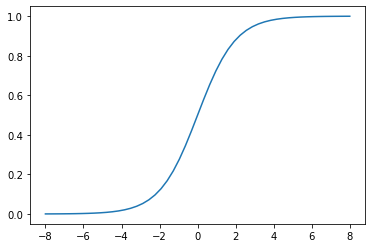

In [395]:
plt.plot(z, sigmoid(z))

In [396]:
def logistic_regression(xi):
    
    score=w0
    for j in range(len(w)):
        score=score+ xi[j] * w[j]
        
    result=sigmoid(score)
    
    return result
    

## 3.10 Training Logistic Regression with Scikit_Learn

* Train a model with Scikit-Learn
* Apply it to the validation dataset
* Calculate the accuracy

In [397]:
from sklearn.linear_model import LogisticRegression

In [398]:
model=LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [399]:
model.coef_[0].round(2)

array([ 0.47, -0.17, -0.41, -0.03, -0.08,  0.06, -0.09, -0.08, -0.03,
       -0.07, -0.34,  0.32, -0.09,  0.  , -0.26,  0.14,  0.01,  0.06,
       -0.09, -0.08,  0.27, -0.09, -0.28, -0.23,  0.12, -0.17,  0.06,
       -0.09, -0.03,  0.07, -0.06,  0.14, -0.25,  0.22, -0.12, -0.09,
        0.1 , -0.07, -0.09,  0.05,  0.21, -0.09, -0.23, -0.07,  0.  ])

In [400]:
model.intercept_[0]

-0.10903366219583091

In [401]:
model.predict(X_val) # Hard Predictions (without probability)

array([0, 0, 0, ..., 0, 1, 1])

In [402]:
y_pred= model.predict_proba(X_val)[:, 1] # soft predictions (with probability)

# 1 because it produces a 2d matrxi with non-churning and churning customers hence we chose the latter

In [403]:
churn_decision=(y_pred >=0.5)

In [404]:
df_val[churn_decision].customerid.reset_index(drop=True)

0      8433-wxgna
1      3440-jpscl
2      2637-fkfsy
3      7228-omtpn
4      6711-fldfb
          ...    
306    5976-jcjrh
307    2034-cgrhz
308    5276-kqwhg
309    6521-yytyi
310    3049-solay
Name: customerid, Length: 311, dtype: object

In [405]:
# checking accuracy
(y_val==churn_decision).mean()

0.8034066713981547

In [406]:
# Lets check the accuracy
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [407]:
# Same as what has been done on 2 code cells above
df_pred= pd.DataFrame()

df_pred['probability']=y_pred

df_pred['prediction']=churn_decision.astype(int)

df_pred['actual']= y_val

df_pred

probability  prediction  actual
0        0.008997           0       0
1        0.204526           0       0
2        0.212224           0       0
3        0.543051           1       1
4        0.213786           0       0
...           ...         ...     ...
1404     0.313675           0       0
1405     0.039360           0       1
1406     0.136394           0       0
1407     0.799772           1       1
1408     0.837408           1       1

[1409 rows x 3 columns]

In [408]:
df_pred['correct']= df_pred['prediction']== df_pred['actual']

In [409]:
df_pred.correct.mean()

0.8034066713981547

## 3.11 Model Interpretation

* Look at the coefficients
* Train a smaller model with fewer features

In [410]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [411]:
model.coef_[0].round(2)

array([ 0.47, -0.17, -0.41, -0.03, -0.08,  0.06, -0.09, -0.08, -0.03,
       -0.07, -0.34,  0.32, -0.09,  0.  , -0.26,  0.14,  0.01,  0.06,
       -0.09, -0.08,  0.27, -0.09, -0.28, -0.23,  0.12, -0.17,  0.06,
       -0.09, -0.03,  0.07, -0.06,  0.14, -0.25,  0.22, -0.12, -0.09,
        0.1 , -0.07, -0.09,  0.05,  0.21, -0.09, -0.23, -0.07,  0.  ])

In [412]:
dict(zip(dv.get_feature_names(),model.coef_[0].round(3)))

{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.316,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.07,
 

In [413]:
# Lets try training a smaller model with few features

small=['contract', 'tenure', 'monthlycharges']

In [414]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [415]:
dicts_train_small=df_train[small].to_dict(orient='records')
dicts_val_small=df_val[small].to_dict(orient='records')

In [416]:
dv_small=DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [417]:
X_train_small= dv_small.transform(dicts_train_small)

In [418]:
model_small=LogisticRegression()

In [419]:
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [420]:
w0=model_small.intercept_[0] # bias term

In [421]:
w=model_small.coef_[0].round(3)
w  # the weights

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [422]:
dict(zip(dv_small.get_feature_names(),w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [423]:
#Using the bias term, we evaluate the customer churn score without knowing anything about them..
# We use sigmoid

-2.47 + 0.97 +50* 0.027 + 5*(-0.036)

-0.3300000000000001

In [424]:
# we use the magic variable _ and use it as a parameter in sigmoid(Only jupyter , not kaggle)

sigmoid(-0.3300000000000001)

0.41824062315816374

In [425]:
# suppose they pay 60 dollars and have stayed for 1 month
-2.47 + 0.97 +60* 0.027 + 1*(-0.036)

0.08399999999999966

In [426]:
# positive z SCORE means
sigmoid(0.08399999999999966)

0.5209876607065322

In [427]:
# Assuming 2 year contract, tenure 24 months and  they pay 30 dollas/m
-2.47 + (-0.949) +30* 0.027 + 24*(-0.036)

-3.473

In [428]:
sigmoid(-3.473)

0.030090303318277657

## 3.12 Using the Model

In [429]:
# Train the model using the whole data and all the features noe

dicts_full_train=df_full_train[categorical + numerical].to_dict(orient='records')

In [430]:
dicts_full_train[:2]

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'tenur

In [431]:
dv= DictVectorizer(sparse=False)

In [432]:
dv.fit(dicts_full_train)

DictVectorizer(sparse=False)

In [433]:
X_full_train=dv.transform(dicts_full_train)

In [434]:
model=LogisticRegression()
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [435]:
# now for the test data set
dicts_test=df_test[categorical + numerical].to_dict(orient='records')

In [436]:
X_test=dv.transform(dicts_test)

In [437]:
y_pred=model.predict_proba(X_test)[:,1]

In [438]:
churn_decision=(y_pred >=0.5)

In [439]:
(churn_decision== y_test).mean()

0.815471965933286

In [440]:
#  picking a random customer from the test set
customer=dicts_test[-1]

customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [441]:
# we want to convert the customer data into a feature matrix(directly because the Dict Vectorizer already can convert the data into a numpy ndarray)
X_small=dv.transform([customer])

In [442]:
X_small.shape

(1, 45)

In [443]:
# predicting the likelihood of churning
model.predict_proba(X_small)[0,1]

0.5968852088173856

In [444]:
# checking whether he was going to churn

y_test[-1]

1

# Section 4

## 4.2 Accuracy and Dummy Model
* Evaluate the model on different thresholds
* Check the accuracy of dummy baselines.

In [445]:
# using the validation dataset

len(y_val)

1409

In [446]:
# correct decisions made by the model
(y_val==churn_decision).sum()

869

In [447]:
#KLets try other thresholds to see if our accuracy improves
thresholds=np.linspace(0,1,21)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [448]:
scores=[]
for t in  thresholds:
    churn_decision=(y_pred>=t)
    score=(y_val==churn_decision).mean()
    
    print("%.2f %.3f" % (t,score))
    scores.append(score)

0.00 0.274
0.05 0.402
0.10 0.448
0.15 0.480
0.20 0.514
0.25 0.532
0.30 0.546
0.35 0.561
0.40 0.576
0.45 0.591
0.50 0.617
0.55 0.629
0.60 0.655
0.65 0.673
0.70 0.691
0.75 0.703
0.80 0.716
0.85 0.725
0.90 0.726
0.95 0.726
1.00 0.726


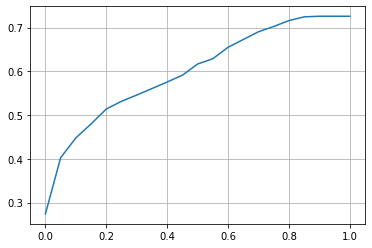

In [449]:
# Plotting them

plt.plot(thresholds, scores)
plt.grid(True)

The peak and scores show that indeed 0.5 is the best choice becuase it has the highest threshold.

#### We can however use the sckit learn library to evaluate the accuracies.


In [450]:
from sklearn.metrics import accuracy_score

accuracy_score(y_val, y_pred>=0.5, normalize=True)

0.6167494677075941

In [451]:
scores=[]
for t in  thresholds:
    score=accuracy_score(y_val, y_pred>=t)
    
    
    
    print("%.2f %.3f" % (t,score))
    scores.append(score)

0.00 0.274
0.05 0.402
0.10 0.448
0.15 0.480
0.20 0.514
0.25 0.532
0.30 0.546
0.35 0.561
0.40 0.576
0.45 0.591
0.50 0.617
0.55 0.629
0.60 0.655
0.65 0.673
0.70 0.691
0.75 0.703
0.80 0.716
0.85 0.725
0.90 0.726
0.95 0.726
1.00 0.726


In [452]:
y_pred>=1.0

from collections import Counter

Counter(y_pred>=1.0)

Counter({False: 1409})

In [453]:
Counter(y_val)

Counter({0: 1023, 1: 386})

### 4.3 Confusion Table
* Different types of erros and correct decsions
* Arranging them in table

In [454]:
actual_positive=(y_val==1)
actual_negative=(y_val==0)

actual_positive

array([False, False, False, ..., False,  True,  True])

In [455]:
t=0.5
predict_positive=(y_pred>=t)
predict_negative=(y_pred<t)

In [456]:
# We use binary operations in numpy(returns and array ONLY if both are true)
tp=(predict_positive & actual_positive).sum()
tn=(predict_negative & actual_negative).sum()
fp=(predict_positive & actual_negative).sum()
fn=(predict_negative & actual_positive).sum()

In [457]:
predict_positive[2:10]

array([False,  True, False, False, False,  True, False, False])

In [458]:
actual_positive[2:10]

array([False,  True, False, False, False, False,  True,  True])

In [459]:
# numpy confusion matrix
confusion_matrix=np.array([[tn,fp],[fn, tp]])
confusion_matrix

array([[790, 233],
       [307,  79]])

In [460]:
# normalizing
confusion_matrix/confusion_matrix.sum() *100

array([[56.06813343, 16.53655075],
       [21.78850248,  5.60681334]])

## 4.4 Precision and Recall

In [461]:
precision=tp/(fp+tp)

precision

0.2532051282051282

In [462]:
recall=tp/(tp+fn)
recall

0.20466321243523317

## 4.5 ROC CURVES
Stands for receiver operating characteristics. pr 
### TPR and FPR

In [463]:
tpr=tp/(tp+fn)

fpr=fp/(fp+tn)

tpr, fpr

(0.20466321243523317, 0.22776148582600195)

In [464]:
scores=[]
thresholds=np.linspace(0,1,101)

for t in thresholds:
    actual_positive=(y_val==1)
    actual_negative=(y_val==0)
    
    predict_positive=(y_pred>=t)
    predict_negative=(y_pred<t)
    
    tp=(predict_positive & actual_positive).sum()
    tn=(predict_negative & actual_negative).sum()
    fp=(predict_positive & actual_negative).sum()
    fn=(predict_negative & actual_positive).sum()
    
    scores.append((t,tp, fp, fn, tn))
    
scores

[(0.0, 386, 1023, 0, 0),
 (0.01, 361, 934, 25, 89),
 (0.02, 341, 873, 45, 150),
 (0.03, 324, 828, 62, 195),
 (0.04, 318, 799, 68, 224),
 (0.05, 306, 762, 80, 261),
 (0.06, 297, 744, 89, 279),
 (0.07, 282, 711, 104, 312),
 (0.08, 264, 680, 122, 343),
 (0.09, 253, 653, 133, 370),
 (0.1, 245, 637, 141, 386),
 (0.11, 240, 619, 146, 404),
 (0.12, 232, 600, 154, 423),
 (0.13, 223, 584, 163, 439),
 (0.14, 217, 571, 169, 452),
 (0.15, 209, 556, 177, 467),
 (0.16, 204, 546, 182, 477),
 (0.17, 198, 536, 188, 487),
 (0.18, 193, 515, 193, 508),
 (0.19, 188, 502, 198, 521),
 (0.2, 183, 482, 203, 541),
 (0.21, 182, 474, 204, 549),
 (0.22, 177, 459, 209, 564),
 (0.23, 171, 448, 215, 575),
 (0.24, 162, 439, 224, 584),
 (0.25, 156, 430, 230, 593),
 (0.26, 151, 422, 235, 601),
 (0.27, 148, 416, 238, 607),
 (0.28, 146, 406, 240, 617),
 (0.29, 142, 397, 244, 626),
 (0.3, 138, 392, 248, 631),
 (0.31, 134, 382, 252, 641),
 (0.32, 129, 378, 257, 645),
 (0.33, 127, 371, 259, 652),
 (0.34, 125, 364, 261, 659),

In [465]:
#turning it into a pandas dataframe..list of tuples
columns=["thresholds",'tp', 'fp','fn','tn']
df_scores=pd.DataFrame(scores, columns=columns)
df_scores['tpr']=df_scores.tp/(df_scores.tp+df_scores.fn)
df_scores['fpr']=df_scores.fp/(df_scores.fp+df_scores.tn)


In [466]:
df_scores['tpr']=df_scores.tp/(df_scores.tp+df_scores.fn)
df_scores['fpr']=df_scores.fp/(df_scores.fp+df_scores.tn)

df_scores[::10]

thresholds   tp    fp   fn    tn       tpr       fpr
0           0.0  386  1023    0     0  1.000000  1.000000
10          0.1  245   637  141   386  0.634715  0.622678
20          0.2  183   482  203   541  0.474093  0.471163
30          0.3  138   392  248   631  0.357513  0.383187
40          0.4  106   318  280   705  0.274611  0.310850
50          0.5   79   233  307   790  0.204663  0.227761
60          0.6   57   157  329   866  0.147668  0.153470
70          0.7   28    78  358   945  0.072539  0.076246
80          0.8    2    16  384  1007  0.005181  0.015640
90          0.9    0     0  386  1023  0.000000  0.000000
100         1.0    0     0  386  1023  0.000000  0.000000

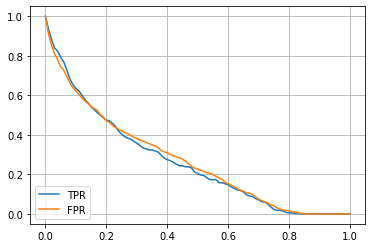

In [467]:
# Now we can plot them
plt.plot(df_scores.thresholds,df_scores['tpr'], label='TPR')
plt.plot(df_scores.thresholds,df_scores['fpr'], label='FPR')
plt.grid(True)
plt.legend(loc=3)

Dummy model with threshold 0 that 'predicts everyone is churning" has the highest FPR and TPR at one.
We want to ensure that FPR goes down, down as quickly as possible.
We also want to ensure that TPR sticks around 1.


## Random Model
Making decisions about the model randomly. To identify the base line.

In [468]:
np.random.seed(1)
y_rand=np.random.uniform(0,1, size=len(y_val))
y_rand.round(3)

array([0.417, 0.72 , 0.   , ..., 0.774, 0.334, 0.089])

For each customer randomly predict if they are going to churn or not.And compare it to the `y_val`

In [469]:
(y_val==(y_rand>=0.5)).mean()

0.5017743080198722

In [470]:
# Create a fucntion fot tpr and fpr to passs any predictins
def tpr_fpr_dataframe(y_val, y_pred):
    scores=[]
    thresholds=np.linspace(0,1,101)

    for t in thresholds:
        actual_positive=(y_val==1)
        actual_negative=(y_val==0)

        predict_positive=(y_pred>=t)
        predict_negative=(y_pred<t)

        tp=(predict_positive & actual_positive).sum()
        tn=(predict_negative & actual_negative).sum()
        fp=(predict_positive & actual_negative).sum()
        fn=(predict_negative & actual_positive).sum()

        scores.append((t,tp, fp, fn, tn))
    columns=["thresholds",'tp', 'fp','fn','tn']
    df_scores=pd.DataFrame(scores, columns=columns)
    df_scores['tpr']=df_scores.tp/(df_scores.tp+df_scores.fn)
    df_scores['fpr']=df_scores.fp/(df_scores.fp+df_scores.tn)
    
    return df_scores

In [471]:
# For the random predictions
df_rand=tpr_fpr_dataframe(y_val, y_rand)

df_rand[::10]

thresholds   tp    fp   fn    tn       tpr       fpr
0           0.0  386  1023    0     0  1.000000  1.000000
10          0.1  347   923   39   100  0.898964  0.902248
20          0.2  307   822   79   201  0.795337  0.803519
30          0.3  276   724  110   299  0.715026  0.707722
40          0.4  237   624  149   399  0.613990  0.609971
50          0.5  202   518  184   505  0.523316  0.506354
60          0.6  161   409  225   614  0.417098  0.399804
70          0.7  121   302  265   721  0.313472  0.295210
80          0.8   78   206  308   817  0.202073  0.201369
90          0.9   40   101  346   922  0.103627  0.098729
100         1.0    0     0  386  1023  0.000000  0.000000

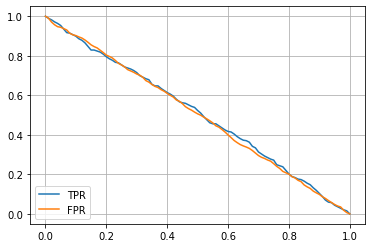

In [472]:
plt.plot(df_rand.thresholds,df_rand['tpr'], label='TPR')
plt.plot(df_rand.thresholds,df_rand['fpr'], label='FPR')
plt.grid(True)
plt.legend(loc=3)

## IDEAL MODEL


In [473]:
num_neg=(y_val==0).sum()
num_pos=(y_val==1).sum()

num_neg, num_pos

(1023, 386)

In [474]:
y_ideal=np.repeat([0,1],[num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [475]:
# creating predictions that a just numbrs between 0 and 1
y_ideal_pred=np.linspace(0,1, len(y_val))

In [476]:
((y_ideal_pred>=0.726)==y_ideal).mean()

1.0

In [477]:
df_ideal=tpr_fpr_dataframe(y_ideal, y_ideal_pred)

df_ideal[::10]

thresholds   tp    fp   fn    tn       tpr       fpr
0           0.0  386  1023    0     0  1.000000  1.000000
10          0.1  386   882    0   141  1.000000  0.862170
20          0.2  386   741    0   282  1.000000  0.724340
30          0.3  386   600    0   423  1.000000  0.586510
40          0.4  386   459    0   564  1.000000  0.448680
50          0.5  386   319    0   704  1.000000  0.311828
60          0.6  386   178    0   845  1.000000  0.173998
70          0.7  386    37    0   986  1.000000  0.036168
80          0.8  282     0  104  1023  0.730570  0.000000
90          0.9  141     0  245  1023  0.365285  0.000000
100         1.0    1     0  385  1023  0.002591  0.000000

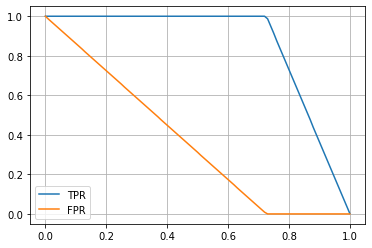

In [478]:
plt.plot(df_ideal.thresholds,df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.thresholds,df_ideal['fpr'], label='FPR')
plt.grid(True)
plt.legend(loc=3)

### Putting Everything Together

#### Actual,Random, Ideal

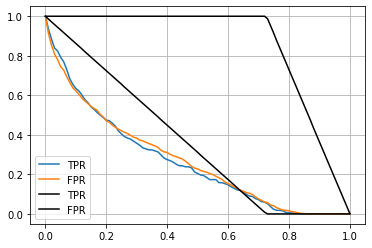

In [479]:
plt.plot(df_scores.thresholds,df_scores['tpr'], label='TPR')
plt.plot(df_scores.thresholds,df_scores['fpr'], label='FPR')

plt.plot(df_ideal.thresholds,df_ideal['tpr'], label='TPR', color='black')
plt.plot(df_ideal.thresholds,df_ideal['fpr'], label='FPR',color='black')



# plt.plot(df_rand.thresholds,df_rand['tpr'], label='TPR')
# plt.plot(df_rand.thresholds,df_rand['fpr'], label='FPR')



plt.legend(loc=3)
plt.grid(True)


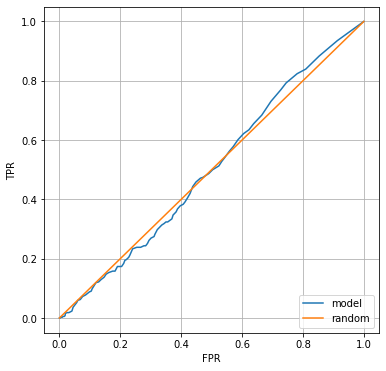

In [480]:
plt.figure(figsize=(6,6))

plt.plot(df_scores.fpr,df_scores.tpr, label='model' )
# plt.plot(df_rand.fpr,df_rand.tpr , label='random')
#plt.plot(df_ideal.fpr,df_ideal.tpr, label= 'ideal' )
plt.plot([0,1],[0,1], label='random')


plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)
plt.grid(True)

In [481]:
# Using sklearn to do ROC
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve(y_val, y_pred)

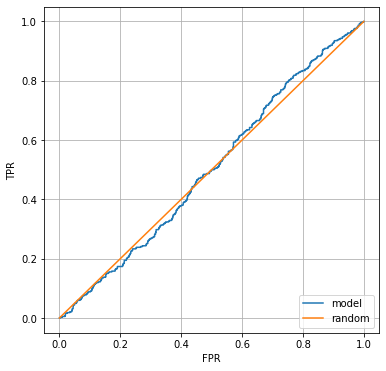

In [482]:
plt.figure(figsize=(6,6))

plt.plot(fpr, tpr, label='model' )
# plt.plot(df_rand.fpr,df_rand.tpr , label='random')
#plt.plot(df_ideal.fpr,df_ideal.tpr, label= 'ideal' )
plt.plot([0,1],[0,1], label='random')


plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)
plt.grid(True)

### ROC AUC
* Area under the ROC curve- useful metric
* Interpreation of AUC

In [483]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.5035238731962783

In [484]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

0.5035238731962783

In [485]:
#it means what is the y_pred score when y_val(actual) is 0 and v.v for 1 is also similar.
neg=y_pred[y_val==0]
pos=y_pred[y_val==1]
pos

array([0.50936106, 0.0754754 , 0.21423481, 0.75877652, 0.06948708,
       0.21239477, 0.09931127, 0.04639776, 0.07472589, 0.50671059,
       0.00989602, 0.56161531, 0.0934219 , 0.68510144, 0.12463265,
       0.03775909, 0.69457084, 0.25108716, 0.52436662, 0.70069561,
       0.728349  , 0.29708227, 0.06018431, 0.19791622, 0.71079699,
       0.14847196, 0.56751543, 0.28230472, 0.0146074 , 0.62596403,
       0.13781173, 0.25491927, 0.02130321, 0.06003844, 0.70666661,
       0.7854751 , 0.39263079, 0.33037906, 0.78189698, 0.53387572,
       0.00463684, 0.68357034, 0.52626458, 0.02207039, 0.05609873,
       0.06008709, 0.02798632, 0.48883161, 0.08354392, 0.00194505,
       0.08130871, 0.00932474, 0.16612145, 0.02320122, 0.01094496,
       0.01705572, 0.40474986, 0.41820869, 0.02680275, 0.26645384,
       0.02600486, 0.37467014, 0.21869968, 0.09324348, 0.41619164,
       0.034807  , 0.08780486, 0.19630456, 0.03381378, 0.03087656,
       0.0181142 , 0.03638212, 0.25787536, 0.83879436, 0.00846

In [486]:
#Lets have 1000000 iterations
import random
n=1000000

success=0

for i in range(n):

    pos_idx=random.randint(0, len(pos)-1)
    neg_idx=random.randint(0, len(neg)-1)

    if pos[pos_idx]>neg[neg_idx]:
        success=success+1
        
success/n

0.503403

In [487]:
#we can use numpy for the above
n=50000
np.random.seed(1)
pos_idx=np.random.randint(0, len(pos), size=n)
neg_idx=np.random.randint(0, len(neg), size=n)
(pos[pos_idx]>  neg[neg_idx]).mean()

0.50364

In [488]:
#selecting the scores of these customers
pos_idx>  neg_idx

array([False, False, False, ...,  True,  True, False])

### Cross- Validation (Parameter Tuning)
* Evaluating the same model on different subsets of Data.
* Getting the average prediction and the spread within predictions

In [489]:
def train(df_train,y_train, C=1.0):
    dicts=df_train[categorical+numerical].to_dict(orient='records')
                                   
    dv=DictVectorizer(sparse=False)
    
    
    X_train=dv.fit_transform(dicts)
    
    model=LogisticRegression(solver='liblinear', max_iter=10000 )
    model.fit(X_train,y_train)
    
    return dv, model

In [490]:
dv, model=train(df_train,y_train, C=0.0001)

In [491]:
# call another function that makes predictions
def predict(df,dv,model):
    dicts=df[categorical+numerical].to_dict(orient='records')
    X=dv.transform(dicts)
    y_pred=model.predict_proba(X)[:,1]
    
    return y_pred

In [492]:
y_pred=predict(df_val,dv, model)

In [493]:
# Now calling K-fold cross validation from sklearn
from sklearn.model_selection import KFold
kf=KFold(n_splits=10, shuffle=True, random_state=1) 

In [494]:
kf.split(df_full_train)

train_idx, val_idx=next(kf.split(df_full_train))

len(train_idx), len(val_idx)

(5070, 564)

In [495]:
df_train=df_full_train.iloc[train_idx]
df_val=df_full_train.iloc[val_idx]

In [496]:
from tqdm import tqdm 
import time

In [497]:
for C in tqdm([0.0001,0.001,0.01,0.5,1,5,10]):
    scores=[]

    for train_idx, val_idx in kf.split(df_full_train):
    
        df_train=df_full_train.iloc[train_idx]
        df_val=df_full_train.iloc[val_idx]

        y_train=df_train.churn.values
        y_val=df_val.churn.values

        dv, model=train(df_train,y_train, C=C)
        y_pred=predict(df_val,dv, model)

        auc=roc_auc_score(y_val, y_pred)

        scores.append(auc)
        
    print("C=%s %.3f %.3f" %(C, np.mean(scores), np.std(scores)))
    

 14%|█▍        | 1/7 [00:03<00:20,  3.36s/it]

C=0.0001 0.842 0.012


 29%|██▊       | 2/7 [00:06<00:16,  3.36s/it]

C=0.001 0.842 0.012


 43%|████▎     | 3/7 [00:09<00:12,  3.19s/it]

C=0.01 0.842 0.012


 57%|█████▋    | 4/7 [00:12<00:08,  2.89s/it]

C=0.5 0.842 0.012


In [ ]:
dv, model=train(df_full_train,df_full_train.churn.values, C=0.00001)
y_pred=predict(df_test,dv, model)
auc=roc_auc_score(y_test, y_pred)

auc

0.8579400803839363